# Logistic Regression: Multi-Class Classification
This will use Iris dataset for multi-class classification.

## Part A: Model Code
Design a Softmax Regression classifier for performing multi-class classification on the Iris dataset.

In [1]:
def sFold(folds,data,labels,model,error_fuction,**model_args):
#def sFold(folds,data,labels,model,error_fuction,**model_args):
    if(labels.shape == (labels.shape[0],)):
        labels = np.expand_dims(labels,axis=1)
    dataset = np.concatenate([data,labels],axis=1)
    s_part = s_partition(dataset,folds)
    pred_y = []
    true_y = []
    for idx,val in enumerate(s_part):
        test_y = val[:,-1]
        #test_y = np.expand_dims(test_y, axis=1)
        test = val[:,:-1]
        train = np.concatenate(np.delete(s_part,idx,0))
        label = train[:,-1]
        train = train[:,:-1]        
        model.fit(train,label,**model_args)       
        pred = model.predict(test)
        pred_y.append(pred)
        true_y.append(test_y)
    pred_y = np.concatenate(pred_y)
    true_y = np.concatenate(true_y)

    avg_error = error_fuction(pred_y,true_y).mean()   
    result = {'Expected labels':true_y, 'Predicted labels': pred_y,'Average error':avg_error }
    return result


#helper
def s_partition(x,s):
    return np.array_split(x,3)

In [2]:
def accuracy(x,y):
    x,y = np.array(x),np.array(y)
    pred = (x == y).astype(np.int)
    return pred.mean()

In [3]:
def compute_confusion_matrix(actual, predicted):

    arary_actual = np.array(actual)
    array_pred = np.array(predicted)

    pd_actual = pd.Series(arary_actual, name='Actual')
    pd_predicted = pd.Series(array_pred, name='Predicted')

    pd_actual = pd.Categorical(pd_actual, categories=[0, 1, 2])
    pd_predicted = pd.Categorical(pd_predicted, categories=[0, 1, 2])

    CM =  pd.crosstab(pd_actual, pd_predicted, dropna=False)

    return CM

# Part B: Exploratory Data Analysis (478 & 878: 10 pts)


In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from itertools import combinations_with_replacement
import functools

### 19. Read the Iris data using the sklearn.datasets.load_iris method.

In [5]:
iris = load_iris()

### 20. Use the techniques from the second recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. 

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 21. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names. 

In [7]:
df=df.sample(frac=1)

### 22. Generate pair plots using the seaborn package (see second recitation notebook).
This will be used to identify and report the redundant features, if there is any. 

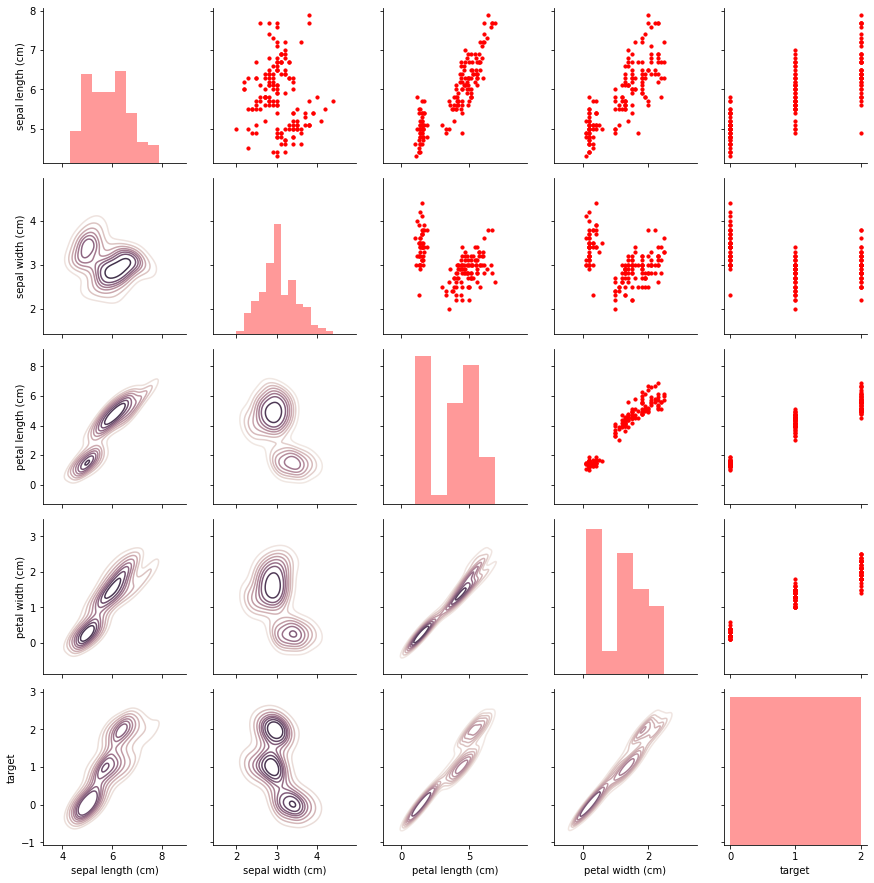

In [8]:
import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [9]:
X = df.drop(columns = 'target') #data matrix
y = df['target']  #target

X = np.array(X)  # to np array 
y = np.array(y)   # to np array

### 23. Scale the features. 

In [10]:
X = (X - np.mean(X))/np.std(X)

### 24. Partition the data into train and test set. Use the “Partition” function from your previous assignment.
For us it is split_trainTest

In [11]:
def split_trainTest(X,y,t):
    train_size = int((1-t) * X.shape[0])   
    return X[:train_size],X[train_size:],y[:train_size],y[train_size:]

In [12]:
X_train, X_test, y_train, y_test = split_trainTest(X,y,t=0.2)

In [13]:
def polynomialFeatures(x,degree = 2):
    x_t = x.T
    features = np.ones(len(x))
    for degree in range(1, degree + 1):
        for items in combinations_with_replacement(x_t, degree):
            features = np.vstack((features,functools.reduce(lambda x, y: x * y, items)))
    return features.T

In [14]:
x_train = polynomialFeatures(X_train,1)
x_test = polynomialFeatures(X_test,1)

### 15. Implement the following function to convert the vector of class indices into a matrix containing a one-hot vector for each instance. function: one_hot_labels(Y).

In [15]:
def one_hot_labels(Y):
    list_y = list(set(Y))
    n_cols = len(list_y)
    n_rows = Y.shape[0]
    Y_one_hot = np.zeros((n_rows, n_cols))
    for i, vale in enumerate(Y):
        Y_one_hot[i][list_y.index(vale)] = 1
    return Y_one_hot

### 16. Implement the following function that computes the softmax score or the normalized exponential of the score of a feature.

In [16]:
def softmax(score):
    Y_prob = np.zeros((score.shape))
    for i in range(0,score.shape[0]):
        Y_prob[i] = np.exp(score[i]) / np.sum(np.exp(score[i]), axis=0)
    return Y_prob

### 17. Implement the following function to compute the cross-entropy loss. function: cross_entropy_loss(Y_one_hot, Y_proba)

In [17]:
def cross_entropy_loss(Y_one_hot, Y_proba):
    
    # it can't work if there are 0 in the Y_proba.
    all_loss = -(Y_one_hot * np.log(Y_proba)).sum(axis=1)
    
    return np.average(all_loss)

### 18. Implement a Softmax_Regression model class. It should have the following
three methods. Note the that “fit” method should implement the batch gradient
descent algorithm. Also, use 1st order derivative of the loss in the gradient
descent.

In [18]:
class Softmax_Regression:
    def __init__(self):
        pass
    
    def fit(self,X,Y,learning_rate=0.01,epochs=1000,tol=None, regularizer=None,lambd=0.0,early_stopping=False, validation_fraction=0.1,**kwargs):
        epoch_counter = 0
        m,n = X.shape
        self.theta = np.zeros([n,len(np.unique(Y))]) 
        self.error = 1e5
        score_loss = []
        val_loss = []
        self.validation_score=1e5
        if early_stopping:
            X,X_valid, Y, Y_valid = split_trainTest(X, Y, validation_fraction)
        while epoch_counter < epochs:
            epoch_counter += 1
            theta = self.theta
            error = self.error
            validation_score = self.validation_score
            regularize=0
            if(regularizer == 'l2'):
                dw = (1/m) * (X.T @ (softmax(X @ theta) - one_hot_labels(Y)) + lambd * theta)
                regularize=((lambd/2)*np.sum(self.theta*self.theta))
            elif(regularizer == 'l1'):
                dw = (1/m) * (X.T @ (softmax(X @ theta) - one_hot_labels(Y)) + lambd * np.sign(theta))
                regularize=((lambd/2)*np.sum(self.theta))
            else:
                dw = (1/m) * (X.T @ (softmax(X @ theta) - one_hot_labels(Y)))
                regularize=0
            self.error=cross_entropy_loss(one_hot_labels(Y),softmax(X @ self.theta)) + regularize
            self.theta = theta - learning_rate * dw
            score_loss.append(self.error)
            if early_stopping:
                self.validation_score = cross_entropy_loss(one_hot_labels(Y_valid),softmax(X_valid @ self.theta)) + regularize
                val_loss.append(self.validation_score)
                
                if (np.abs(self.validation_score) > np.abs(validation_score)):
                    print(f'\nEarly Stopping at : {epoch_counter}\n')
                    plt.plot(range(epoch_counter), val_loss, "--", color='darkorange', lw = 2)
                    plt.xlabel("epoch")
                    plt.ylabel("Loss : J(w)")
                    break
            if(tol != None and np.abs(self.error - error) < tol):         
                break

    
    def predict(self,X):
        prob = softmax(X @ self.theta)
        return np.argmax(prob,axis=1)
    
    def prob(Self,X):
        return softmax(X @ self.theta)

25. Model Selection via Hyper-Parameter tuning.

In [19]:
def findOptimalSoft(epochs = 3000):
    validation_accuracy = np.empty((3,4,2,5))
    lambd =  [0.1, 0.01, 0.001, 0.0001]
    learning_rate =  [0.1, 0.01, 0.001]
    regularizer= ['l1', 'l2']
    tol =  [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
    maxScore = 0
    for i,lr in enumerate(learning_rate):
        for j,ld in enumerate(lambd):
            for x,rg in enumerate(regularizer):
                for t,tl in enumerate(tol):
                    logreg = Softmax_Regression()
                    model_args = {'learning_rate' : lr,'lambd':ld,'regularizer' : rg,'epochs' : epochs, 'tol' : tl}
                    result = sFold(5,x_train,y_train,logreg,error_fuction = accuracy,**model_args)
                    #print('\nLearning Rate:',lr,'\nlambd',ld,'\nRegularizer:',rg,'tol',tl)
                    #print(result)
                    validation_accuracy[i,j,x,t] = result['Average error']
                    if validation_accuracy[i,j,x,t] > maxScore:
                        maxScore = validation_accuracy[i,j,x,t]
                        index = [i,j,x,t]

    print(index)
    a,b,c,d = index
    print('optimal learning_rate: ',learning_rate[a])
    print('optimal lambd: ',lambd[b])
    print('optimal regularizer: ',regularizer[c])
    print('optimal tol',tol[d])
    print('optimal value',validation_accuracy[a,b,c,d])

In [20]:
findOptimalSoft(epochs=100)

[0, 0, 0, 0]
optimal learning_rate:  0.1
optimal lambd:  0.1
optimal regularizer:  l1
optimal tol 0.001
optimal value 0.925


In [21]:
sftmax_bgd = Softmax_Regression()
sftmax_bgd.fit(x_train,y_train,epochs=3000,regularizer = 'l1',lambd=0.1,learning_rate=0.1,tol=1e-05)
pred = sftmax_bgd.predict(x_test)

### 26. Evaluate your model on the test data and report the accuracy and confusion matrix. 

In [22]:
accuracy(y_test,pred)

0.9666666666666667

In [23]:
compute_confusion_matrix(y_test,pred)

col_0,0,1,2
row_0,,,
0,14,0,0
1,0,4,0
2,0,1,11


In [24]:
sftmax_bgd = Softmax_Regression()


Fitting with ideal parameters and testing

In [25]:
sftmax_bgd.fit(x_train,y_train,epochs=3000,regularizer = 'l2',lambd=0.1)

In [26]:
pred = sftmax_bgd.predict(x_test)

In [27]:
accuracy(y_test,pred)

0.9666666666666667

### 27. [Extra Credit for 478 and Mandatory for 878] Implement early stopping in the “fit” method of the Softmax_Regression model. 
You will have to use the following two parameters of the model: early_stopping and validation_fraction. Also note that when training the model using early stopping it should generate an early stopping curve. 

Test to show how the early stopping happens


Early Stopping at : 746



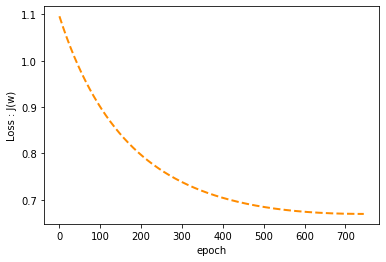

In [28]:
sftmax_bgd.fit(x_train,y_train,epochs=3000,regularizer = 'l2',lambd=0.1,early_stopping=True)

In [29]:
pred2 = sftmax_bgd.predict(x_test)

In [30]:
accuracy(y_test,pred2)

1.0

In [31]:
compute_confusion_matrix(y_test,pred2)

col_0,0,1,2
row_0,,,
0,14,0,0
1,0,4,0
2,0,0,12


### 28. [Extra Credit for both 478 & 878] Implement the Stochastic Gradient Descent Logistic Regression algorithm. Using cross-validation determine the best model. Evaluate your model on test data and report the accuracy and confusion matrix.

In [32]:
class Softmax_Regression_SGD:
    def __init__(self):
        pass
    
    def fit(self,X,Y,learning_rate=0.01,epochs=1000,tol=None, regularizer=None,lambd=0.0,early_stopping=False, validation_fraction=0.1,**kwargs):
        epoch_counter = 0
        m,n = X.shape
        self.theta = np.zeros([n,len(np.unique(Y))]) 
        self.error = 1e5
        while epoch_counter < epochs:
            epoch_counter += 1
            for i in range (m):
                error = self.error
                theta = self.theta
                regularize=0
                ## just doing for l2
                if(regularizer == 'l2'):
                    dw = (X[i].T[:,None] @ (softmax(X @ theta)[i][:,None].T - one_hot_labels(Y)[i][:,None].T) + lambd * theta)
                    regularize=((lambd/2)*np.sum(self.theta*self.theta))
                elif(regularizer == 'l1'):
                    dw = (X[i].T[:,None] @ (softmax(X @ theta)[i][:,None].T - one_hot_labels(Y)[i][:,None].T) + lambd * np.sign(theta))
                    regularize=((lambd/2)*np.sum(self.theta))
                else:
                    dw = (X[i].T[:,None] @ (softmax(X @ theta)[i][:,None].T - one_hot_labels(Y)[i][:,None].T))
                    regularize=0
                self.theta = theta - learning_rate * dw
                self.error=cross_entropy_loss(one_hot_labels(Y),softmax(X @ self.theta))+regularize
                if(tol != None and np.abs(self.error - error) < tol):         
                    break
    
    def predict(self,X):
        prob = softmax(X @ self.theta)
        return np.argmax(prob,axis=1)

In [33]:
sftmax_Sgd = Softmax_Regression_SGD()

In [34]:
sftmax_Sgd.fit(x_train,y_train,epochs=100,regularizer = 'l1', learning_rate=0.1, lambd=0.001, tol=1e-05)

In [35]:
pred = sftmax_bgd.predict(x_test)

In [36]:
accuracy(y_test,pred)

1.0

In [37]:
compute_confusion_matrix(y_test,pred)

col_0,0,1,2
row_0,,,
0,14,0,0
1,0,4,0
2,0,0,12


In [38]:
def findOptimalSoft_SGD(epochs = 3000):
    validation_accuracy = np.empty((3,4,2,5))
    lambd =  [0.1, 0.01, 0.001, 0.0001]
    learning_rate =  [0.1, 0.01, 0.001]
    regularizer= ['l1', 'l2']
    tol =  [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
    maxScore = 0
    for i,lr in enumerate(learning_rate):
        for j,ld in enumerate(lambd):
            for x,rg in enumerate(regularizer):
                for t,tl in enumerate(tol):
                    logreg = Softmax_Regression_SGD()
                    model_args = {'learning_rate' : lr,'lambd':ld,'regularizer' : rg,'epochs' : epochs, 'tol' : tl}
                    result = sFold(5,x_train,y_train,logreg,error_fuction = accuracy,**model_args)
                    validation_accuracy[i,j,x,t] = result['Average error']
                    if validation_accuracy[i,j,x,t] > maxScore:
                        maxScore = validation_accuracy[i,j,x,t]
                        index = [i,j,x,t]

    print(index)
    a,b,c,d = index
    print('optimal learning_rate: ',learning_rate[a])
    print('optimal lambd: ',lambd[b])
    print('optimal regularizer: ',regularizer[c])
    print('optimal tol',tol[d])
    print('optimal value',validation_accuracy[a,b,c,d])

In [ ]:
findOptimalSoft_SGD(epochs=30)